# Paleta de cores

In [1]:
# Definindo a paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2 = '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f'

# Bibliotecas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Ellipse
import numpy as np

# Conhecendo os dados (Base de dados 1)

In [3]:
vol_amaciante = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/dataviz-graficos/master/dados/volume_amaciante.csv')
vol_amaciante.head()

,Volume
0,999.8
1,999.5
2,999.7
3,999.1
4,999.8


In [4]:
vol_amaciante.describe()

,Volume
count,1000.00000
mean,999.98970
std,0.48553
min,998.30000
25%,999.70000
50%,1000.00000
75%,1000.30000
max,1001.50000


# Distribuição dos dados

Histograma de colunas

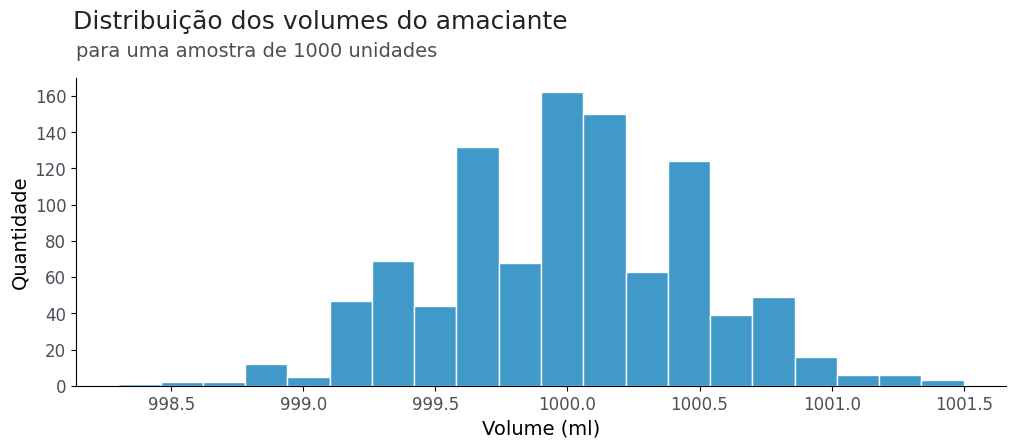

In [5]:
fig, ax = plt.subplots(figsize=(12,4))
sns.set_theme(style='white')

# ax = sns.histplot(data=vol_amaciante, x='Volume', binwidth=0.1, color=AZUL2) # ajustando o intervalo pela largura dos bins
ax = sns.histplot(data=vol_amaciante, x='Volume', bins=20, color=AZUL2) # ajustando o intervalo pela quantidade de bins

plt.suptitle('Distribuição dos volumes do amaciante', size=18, color=CINZA1,
             ha='right',
             x=0.535,
             y=1.05)
plt.title('para uma amostra de 1000 unidades', fontsize=14, color=CINZA2,
          pad=15,
          loc='left')
ax.set_xlabel('Volume (ml)', fontsize=14)
ax.set_ylabel('Quantidade', fontsize=14)
ax.yaxis.set_tick_params(labelsize=12, labelcolor=CINZA2)
ax.xaxis.set_tick_params(labelsize=12, labelcolor=CINZA2)
sns.despine()

plt.show()

Histograma de linhas

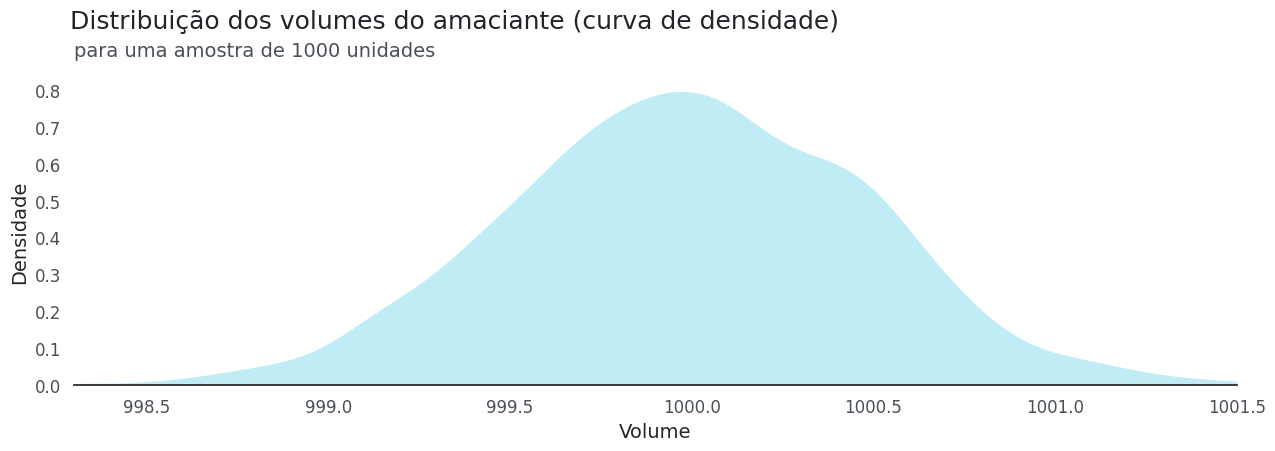

In [6]:
def grafico_densidade():

    fig, ax = plt.subplots(figsize=(15,4))
    sns.set_theme(style='white')

    ax = sns.kdeplot(data=vol_amaciante, x='Volume', color=AZUL3, lw=0, fill=True)

    plt.suptitle('Distribuição dos volumes do amaciante (curva de densidade)', size=18, color=CINZA1,
             ha='right',
             x=0.635,
             y=1.05)
    plt.title('para uma amostra de 1000 unidades', fontsize=14, color=CINZA2,
              pad=15,
              loc='left')
    ax.set_xlabel('Volume', fontsize=14)
    ax.set_ylabel('Densidade', fontsize=14)
    ax.yaxis.set_tick_params(labelsize=12, labelcolor=CINZA2)
    ax.xaxis.set_tick_params(labelsize=12, labelcolor=CINZA2)
    ax.set_xlim(vol_amaciante.Volume.min(), vol_amaciante.Volume.max())
    sns.despine(left=True)

    return ax

ax = grafico_densidade()

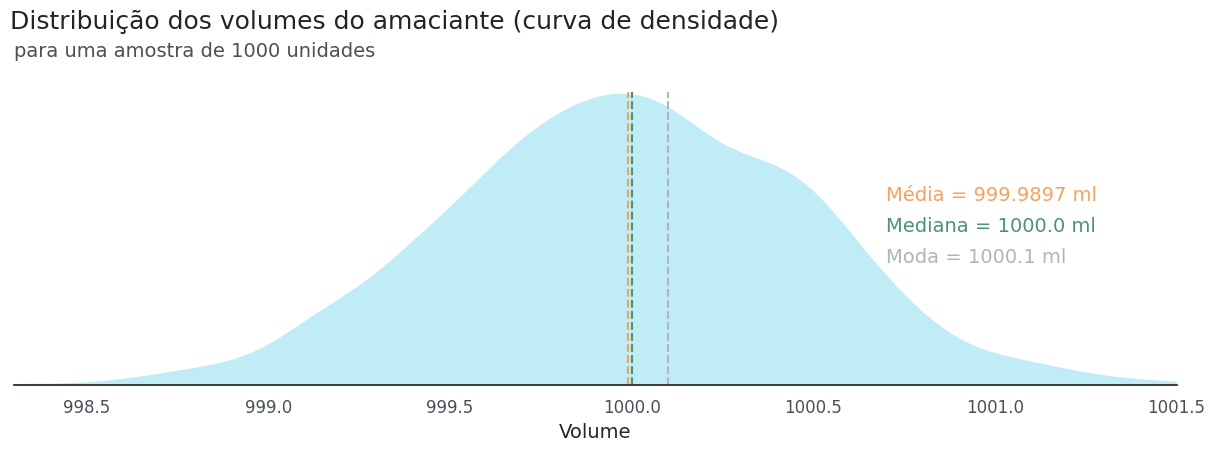

In [7]:
ax = grafico_densidade()

ax.set_ylabel('')
ax.set_yticklabels([])

estat = vol_amaciante.Volume.mean(), vol_amaciante.Volume.median(), vol_amaciante.Volume.mode()[0]
desc = ['Média', 'Mediana', 'Moda']
cores = [LARANJA1, VERDE1, CINZA3]

ax.vlines(x=estat, ymin=0, ymax=0.8, colors=cores, linestyles='--')

for i in range(len(estat)):
    ax.text(0.75, (0.6 - i/10), f'{desc[i]} = {estat[i]} ml',
            fontsize=14, color=cores[i], transform=ax.transAxes)

fig = ax.get_figure()

Boxplot

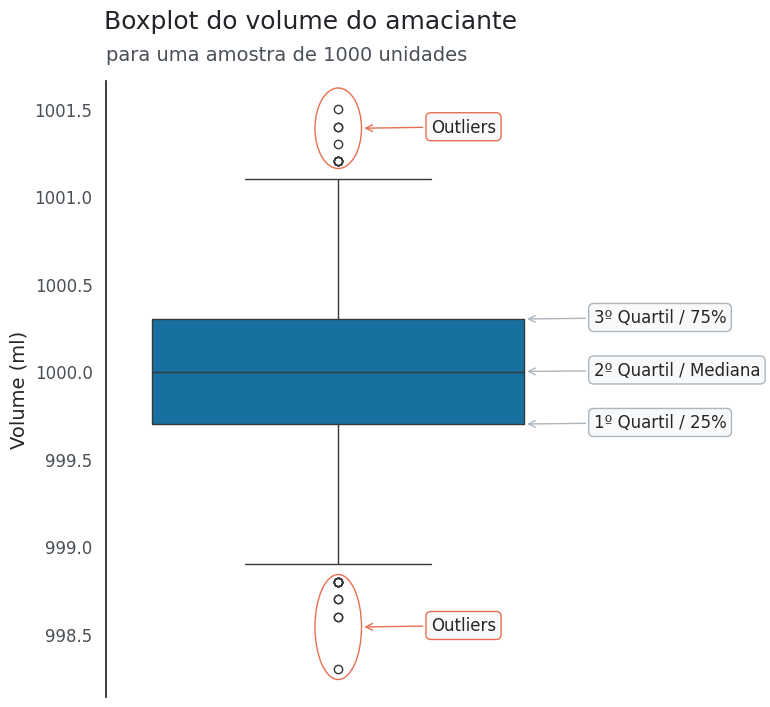

In [8]:
def boxplot_amaciantes():

    fig, ax = plt.subplots(figsize=(6,8))
    sns.set_theme(style='white')

    ax = sns.boxplot(data=vol_amaciante, y='Volume', orient='v', color=AZUL2)

    plt.suptitle('Boxplot do volume do amaciante', size=18, color=CINZA1, ha='right', x=0.81, y=0.97)
    plt.title('para uma amostra de 1000 unidades', fontsize=14, color=CINZA2, pad=15, loc='left')
    ax.set_xlabel('')
    ax.set_ylabel('Volume (ml)', fontsize=14)
    ax.yaxis.set_tick_params(labelsize=12, labelcolor=CINZA2)
    sns.despine(bottom=True)

    # Gerando elipses dos outliers
    y_min, y_max = ax.get_ybound()
    outlier_sup = Ellipse((0, y_max - 0.27), width=0.1, height=0.46, color=VERMELHO1, fill=False)
    outlier_inf = Ellipse((0, y_min + 0.4), width=0.1, height=0.6, color=VERMELHO1, fill=False)
    ax.add_patch(outlier_sup)
    ax.add_patch(outlier_inf)

    # Convertendo os valores para float (evita FutureWarning)
    q1 = float(vol_amaciante['Volume'].quantile(0.25))
    median = float(vol_amaciante['Volume'].median())
    q3 = float(vol_amaciante['Volume'].quantile(0.75))

    # Adicionando a explicação dos elementos de um boxplot
    ax.annotate("Outliers", xy=(0 + 0.05, y_max - 0.27), xycoords='data',     # coordenadas do ponto desejado
                bbox=dict(boxstyle="round", fc=CINZA5, ec=VERMELHO1),         # caixa de texto
                xytext=(50, -2.5), textcoords='offset points',                   # posição do texto
                arrowprops=dict(arrowstyle="->", color=VERMELHO1))            # propriedades da seta

    ax.annotate("Outliers", xy=(0 + 0.05, y_min + 0.4), xycoords='data',
                bbox=dict(boxstyle="round", fc=CINZA5, ec=VERMELHO1),
                xytext=(50, -2.5), textcoords='offset points',
                arrowprops=dict(arrowstyle="->", color=VERMELHO1))

    ax.annotate("1º Quartil / 25%", xy=(0.4, q1), xycoords='data',
                bbox=dict(boxstyle="round", fc=CINZA5, ec=CINZA3),
                xytext=(50, -2.5), textcoords='offset points',
                arrowprops=dict(arrowstyle="->", color=CINZA3))

    ax.annotate("2º Quartil / Mediana", xy=(0.4, median), xycoords='data',
                bbox=dict(boxstyle="round", fc=CINZA5, ec=CINZA3),
                xytext=(50, -2.5), textcoords='offset points',
                arrowprops=dict(arrowstyle="->", color=CINZA3))

    ax.annotate("3º Quartil / 75%", xy=(0.4, q3), xycoords='data',
                bbox=dict(boxstyle="round", fc=CINZA5, ec=CINZA3),
                xytext=(50, -2.5), textcoords='offset points',
                arrowprops=dict(arrowstyle="->", color=CINZA3))

    return ax

ax = boxplot_amaciantes()

# Análise proposta - População (Base de dados 2)

Histograma e Curva de densidade de uma amostra com idades de uma população

In [9]:
dados_pop = pd.read_csv('/content/drive/MyDrive/ALURA/pop_idade.csv')
dados_pop

,idade
0,39
1,33
2,41
3,50
4,32
...,...
495,40
496,24
497,33
498,26


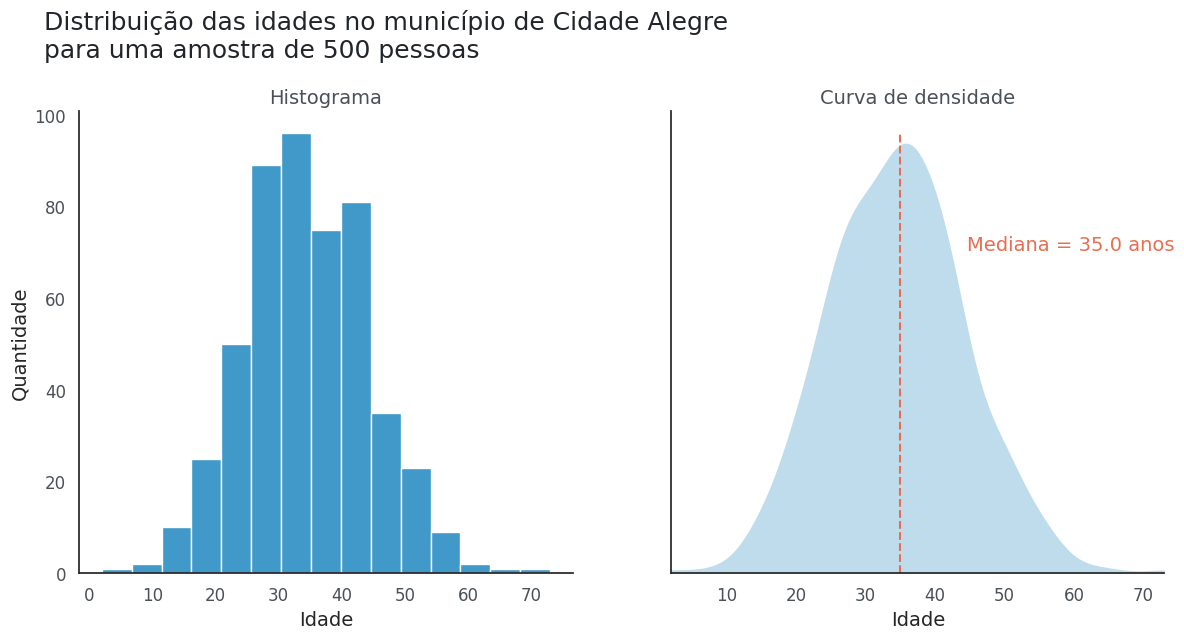

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(14,6))
sns.set_theme(style='white')

sns.histplot(data=dados_pop, x='idade', color=AZUL2, bins=15, ax=axs[0])
sns.kdeplot(data=dados_pop, x='idade', color=AZUL2, lw=0, fill=True, ax=axs[1])

plt.suptitle('Distribuição das idades no município de Cidade Alegre\npara uma amostra de 500 pessoas',
             size=18, color=CINZA1, ha='left', x=0.1, y=1.05)

axs[0].set_title('Histograma', fontsize=14, color=CINZA2, loc='center')
axs[0].set_xlabel('Idade', fontsize=14)
axs[0].set_ylabel('Quantidade', fontsize=14)
axs[0].yaxis.set_tick_params(labelsize=12, labelcolor=CINZA2)
axs[0].xaxis.set_tick_params(labelsize=12, labelcolor=CINZA2)

axs[1].set_title('Curva de densidade', fontsize=14, color=CINZA2, loc='center')
axs[1].set_xlabel('Idade', fontsize=14)
axs[1].set_ylabel('')
axs[1].set_yticklabels([])
axs[1].yaxis.set_tick_params(labelsize=12, labelcolor=CINZA2)
axs[1].xaxis.set_tick_params(labelsize=12, labelcolor=CINZA2)
axs[1].set_xlim(dados_pop.idade.min(), dados_pop.idade.max())

axs[1].vlines(x=dados_pop.idade.median(), ymin=0, ymax=0.04, colors=VERMELHO1, linestyles='--')
axs[1].text(0.6, 0.7, f'Mediana = {dados_pop.idade.median()} anos',
        fontsize=14,
        color=VERMELHO1,
        transform=axs[1].transAxes)

sns.despine()

plt.show()

# Análise proposta - Boxplot (Base de dados 1)

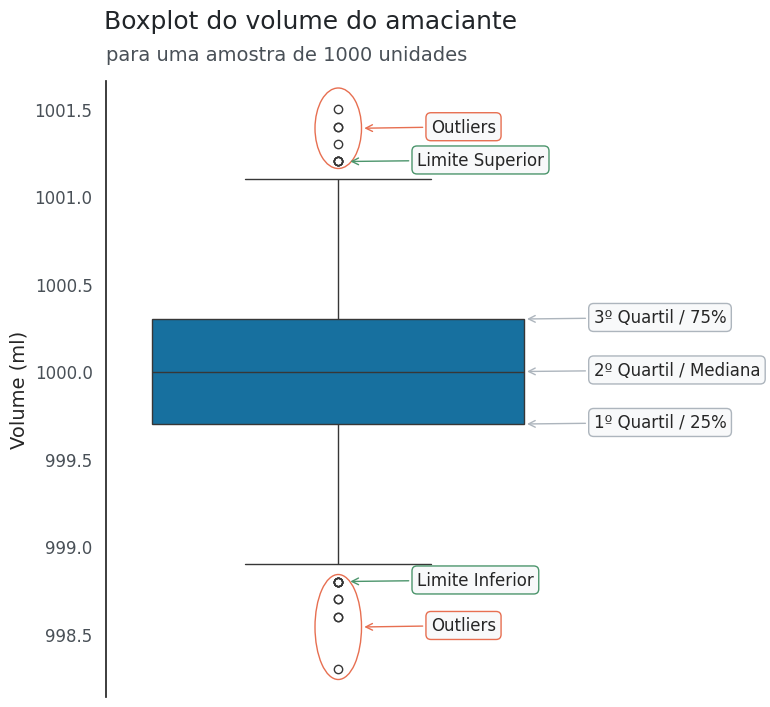

In [11]:
ax = boxplot_amaciantes()

q1 = float(vol_amaciante['Volume'].quantile(0.25))
median = float(vol_amaciante['Volume'].median())
q3 = float(vol_amaciante['Volume'].quantile(0.75))

iqr = q3 - q1
limite_sup = q3 + 1.5 * iqr
limite_inf = q1 - 1.5 * iqr

ax.annotate("Limite Superior", xy=(0.02, limite_sup), xycoords='data',
            bbox=dict(boxstyle="round", fc=CINZA5, ec=VERDE1),
            xytext=(50, -2.5), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color=VERDE1))

ax.annotate("Limite Inferior", xy=(0.02, limite_inf), xycoords='data',
            bbox=dict(boxstyle="round", fc=CINZA5, ec=VERDE1),
            xytext=(50, -2.5), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color=VERDE1))

fig = ax.get_figure()

# Conhecendo os dados (Base de dados 3)

In [12]:
df_medidas = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/dataviz-graficos/master/dados/medidas_sabao_em_po.csv')
df_medidas.sample(5)

,comprimento,altura,largura,amostra
688,20.04,14.96,4.98,D
50,20.14,14.86,4.98,A
104,20.04,14.96,5.07,A
984,19.97,15.03,5.04,E
886,20.02,14.98,5.10,E


In [13]:
df_medidas.describe()

,comprimento,altura,largura
count,1000.000000,1000.00000,1000.000000
mean,20.025740,14.97233,5.000050
std,0.059189,0.06294,0.051081
min,19.910000,14.69000,4.840000
25%,19.980000,14.93000,4.970000
50%,20.020000,14.99000,5.000000
75%,20.060000,15.02000,5.030000
max,20.250000,15.09000,5.190000


# Violin Plot (Base de dados 3)

**Questionamento:**

1. Como está a distribuição das medidas de comprimento da embalagem de sabão em pó para cada uma das amostras?

Comprimento

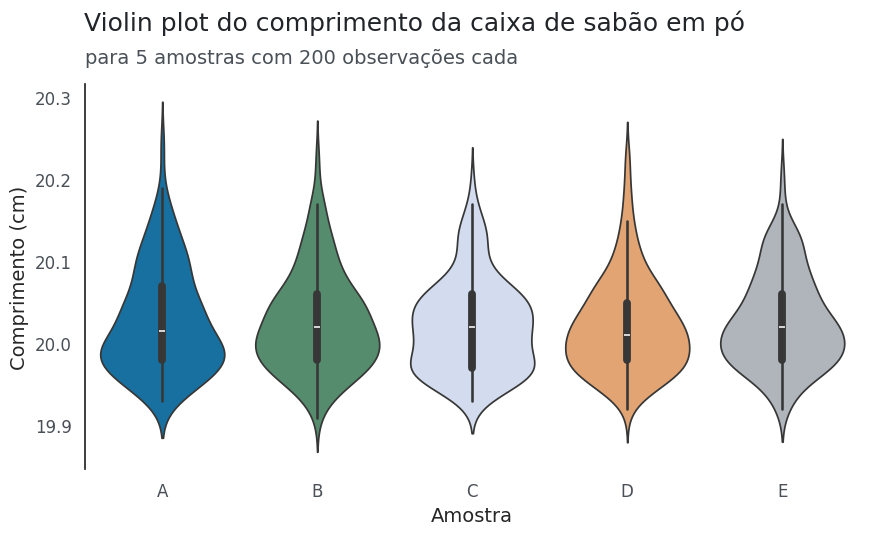

In [14]:
# Geração do gráfico 'Violin plot'
fig, ax = plt.subplots(figsize=(10,5))
sns.set_theme(style='whitegrid')

ax = sns.violinplot(data=df_medidas, x='amostra', y='comprimento',
                    hue='amostra',
                    legend=False,
                    palette=[AZUL2, VERDE1, AZUL5, LARANJA1, CINZA3])

# Personalização do gráfico
plt.suptitle('Violin plot do comprimento da caixa de sabão em pó', size=18, color=CINZA1,
             ha='right',
             x=0.785,
             y=1.03)
plt.title('para 5 amostras com 200 observações cada', fontsize=14, color=CINZA2,
          pad=15,
          loc='left')
ax.set_xlabel('Amostra', fontsize=14)
ax.set_ylabel('Comprimento (cm)', fontsize=14)
ax.yaxis.set_tick_params(labelsize=12, labelcolor=CINZA2)
ax.xaxis.set_tick_params(labelsize=12, labelcolor=CINZA2)
sns.despine(bottom=True)

plt.show()

Largura

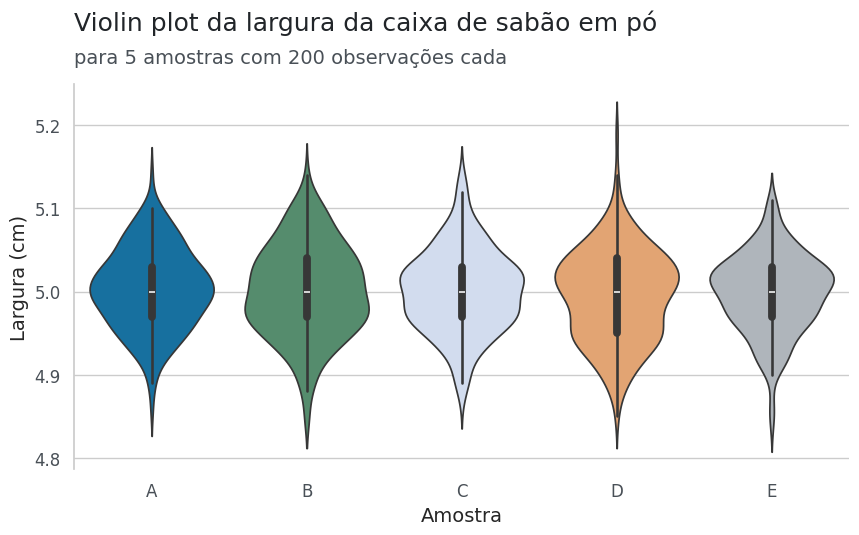

In [15]:
# Geração do gráfico 'Violin plot'
fig, ax = plt.subplots(figsize=(10,5))
sns.set_theme(style='whitegrid')

ax = sns.violinplot(data=df_medidas, x='amostra', y='largura',
                    hue='amostra',
                    legend=False,
                    palette=[AZUL2, VERDE1, AZUL5, LARANJA1, CINZA3])

# Personalização do gráfico
plt.suptitle('Violin plot da largura da caixa de sabão em pó', size=18, color=CINZA1,
             ha='right',
             x=0.708,
             y=1.03)
plt.title('para 5 amostras com 200 observações cada', fontsize=14, color=CINZA2,
          pad=15,
          loc='left')
ax.set_xlabel('Amostra', fontsize=14)
ax.set_ylabel('Largura (cm)', fontsize=14)
ax.yaxis.set_tick_params(labelsize=12, labelcolor=CINZA2)
ax.xaxis.set_tick_params(labelsize=12, labelcolor=CINZA2)
sns.despine(bottom=True)

plt.show()

Altura

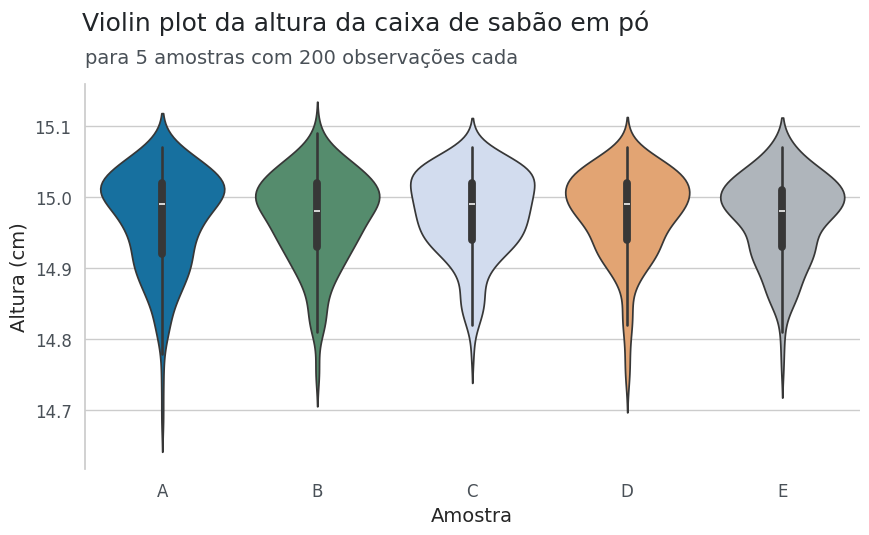

In [16]:
# Geração do gráfico 'Violin plot'
fig, ax = plt.subplots(figsize=(10,5))
sns.set_theme(style='whitegrid')

ax = sns.violinplot(data=df_medidas, x='amostra', y='altura',
                    hue='amostra',
                    legend=False,
                    palette=[AZUL2, VERDE1, AZUL5, LARANJA1, CINZA3])

# Personalização do gráfico
plt.suptitle('Violin plot da altura da caixa de sabão em pó', size=18, color=CINZA1,
             ha='right',
             x=0.69,
             y=1.03)
plt.title('para 5 amostras com 200 observações cada', fontsize=14, color=CINZA2,
          pad=15,
          loc='left')
ax.set_xlabel('Amostra', fontsize=14)
ax.set_ylabel('Altura (cm)', fontsize=14)
ax.yaxis.set_tick_params(labelsize=12, labelcolor=CINZA2)
ax.xaxis.set_tick_params(labelsize=12, labelcolor=CINZA2)
sns.despine(bottom=True)

plt.show()

# Gráfico de dispersão (Base de dados 3)

**Questionamento:**

2. Como estão dispostas as medidas de comprimento e altura da amostra A? Se quisermos rejeitar todos os itens em que o valor de comprimento e altura está 10% acima ou abaixo do valor de 20 e 15 respectivamente, quais seriam rejeitados?

In [17]:
df_a = df_medidas.query('amostra == "A"')[['comprimento', 'altura']]
df_a.head()

,comprimento,altura
0,20.11,14.89
1,20.13,14.86
2,19.99,15.01
3,20.06,14.93
4,19.99,15.01


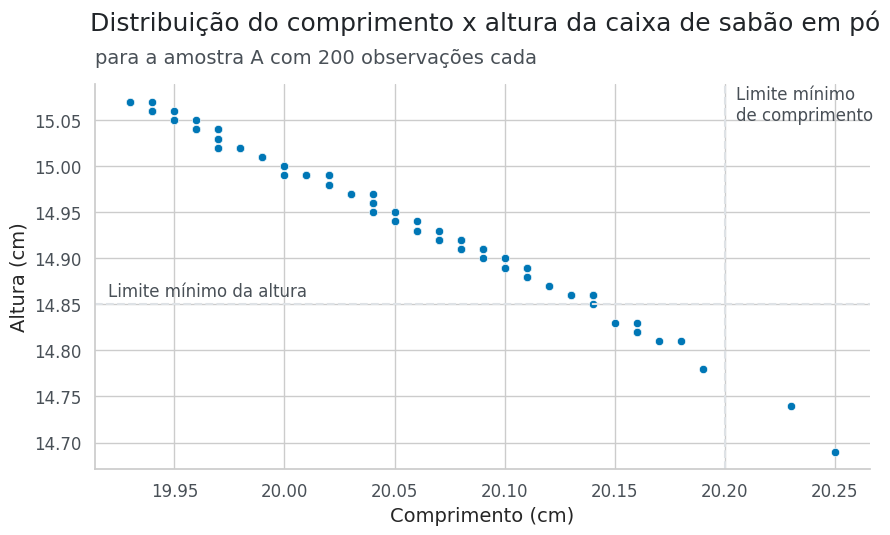

In [18]:
# Gerando a função que cria o gráfico de dispersão
def grafico_dispersao(map_cores: list=(AZUL2), pct: float=0.01):

    fig, ax = plt.subplots(figsize=(10,5))
    sns.set_theme(style='white')

    ax = sns.scatterplot(data=df_a, x='comprimento', y='altura', color=map_cores)

    # Personalização do gráfico
    plt.suptitle('Distribuição do comprimento x altura da caixa de sabão em pó',
                 size=18,
                 color=CINZA1,
                 ha='right',
                 x=0.91,
                 y=1.03)
    plt.title('para a amostra A com 200 observações cada', fontsize=14, color=CINZA2,
              pad=15,
              loc='left')
    ax.set_xlabel('Comprimento (cm)', fontsize=14)
    ax.set_ylabel('Altura (cm)', fontsize=14)
    ax.yaxis.set_tick_params(labelsize=12, labelcolor=CINZA2)
    ax.xaxis.set_tick_params(labelsize=12, labelcolor=CINZA2)
    sns.despine()

    # Linha horizontal com limite mínimo de altura desejado
    ax.text(19.92, 14.855,
            'Limite mínimo da altura',
            fontsize=12,
            color=CINZA2,
            va='bottom')
    plt.axhline(y= 15 * (1-pct), color=CINZA4, linestyle='--')

    # Linha vertical com limite mínimo de comprimento desejado
    ax.text(20.205, 15.05,
            'Limite mínimo\nde comprimento',
            fontsize=12,
            color=CINZA2,
            ha='left')
    plt.axvline(x= 20 * (1+pct), color=CINZA4, linestyle='--')

    return ax

ax = grafico_dispersao()

Mapeando os dados por cores

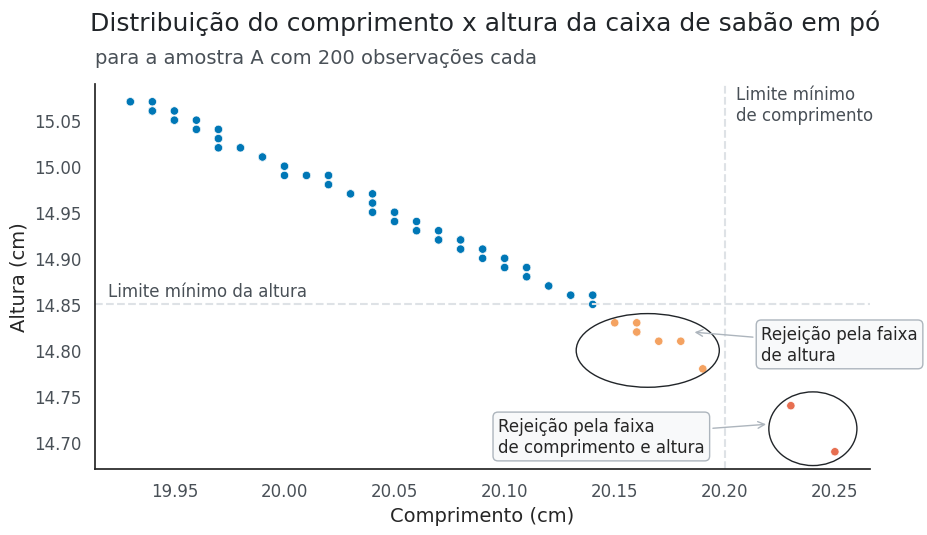

In [19]:
# Definindo as cores do gráfico
cores = [VERMELHO1, LARANJA1, AZUL2]

# Gerando gráfico de dispersão rejeitando os valores fora da faixa requisitada (1%)
pct = 0.01
rejeita_comp = [True if (c > 20*(1+pct) or c < 20*(1-pct)) else False for c in df_a['comprimento']]
rejeita_alt = [True if (a > 15*(1+pct) or a < 15*(1-pct)) else False for a in df_a['altura']]

# Mapeamento das cores
map_cores = np.where(rejeita_comp, cores[0], np.where(rejeita_alt, cores[1], cores[2]))

ax = grafico_dispersao(map_cores, pct)

# Selecionando as áreas de rejeição
rej_comp = Ellipse((20.165, 14.80), width=0.065, height=0.08, color=CINZA1, fill=False)
rej_alt = Ellipse((20.24, 14.715), width=0.04, height=0.08, color=CINZA1, fill=False)
ax.add_patch(rej_comp)
ax.add_patch(rej_alt)

ax.annotate('Rejeição pela faixa\nde altura', xy=(20.185, 14.82), xycoords='data',
            bbox=dict(boxstyle='round', fc=CINZA5, ec=CINZA3),
            xytext=(50, -20), textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color=CINZA3))

ax.annotate('Rejeição pela faixa\nde comprimento e altura', xy=(20.22, 14.72), xycoords='data',
            bbox=dict(boxstyle='round', fc=CINZA5, ec=CINZA3),
            xytext=(-195, -20), textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color=CINZA3))

fig = ax.get_figure()

# Análises propostas (Base de dados 4)

In [20]:
df_notas = pd.read_csv('/content/drive/MyDrive/ALURA/notas.csv')
df_notas

,Turma,Nota
0,Turma 1,79
1,Turma 1,73
2,Turma 1,80
3,Turma 1,88
4,Turma 1,72
...,...,...
295,Turma 3,65
296,Turma 3,75
297,Turma 3,71
298,Turma 3,74


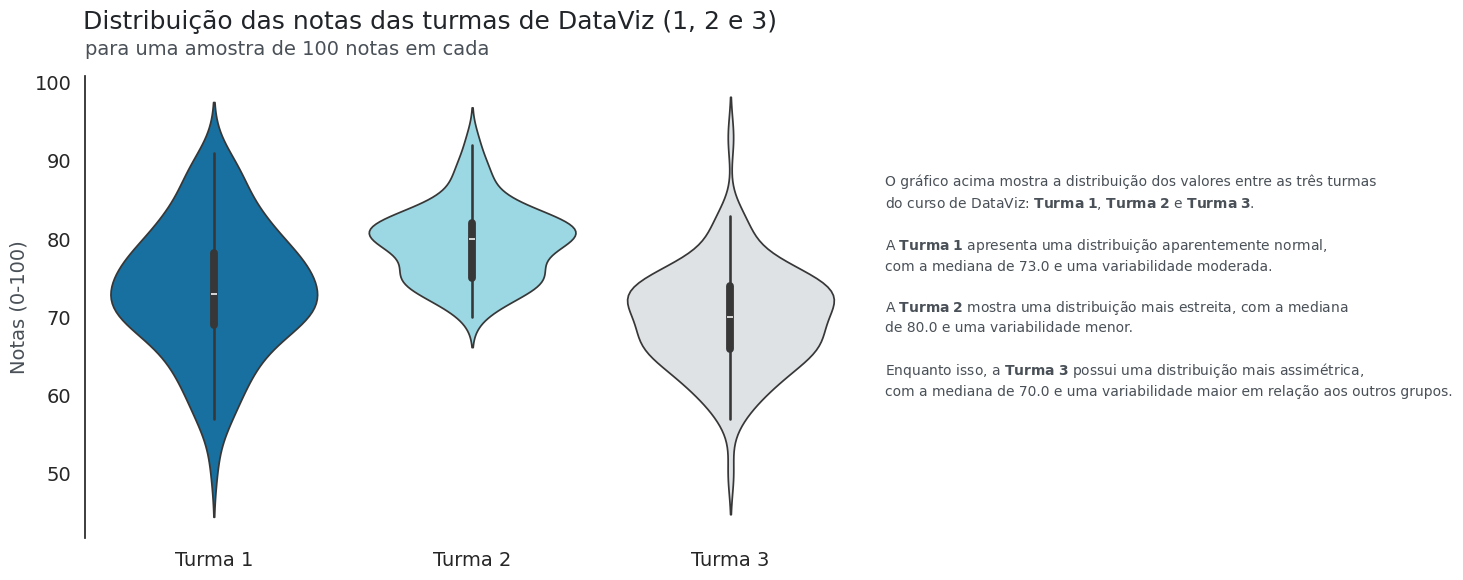

In [21]:
# Definindo as cores do gráfico
cores = [AZUL2, AZUL4, CINZA4]

# Gerando área do gráfico
fig, ax = plt.subplots(figsize=(10,6))
sns.set_theme(style='whitegrid')

# Gerando gráfico tipo 'Violin plot'
ax = sns.violinplot(data=df_notas,
                    x='Turma',
                    y='Nota',
                    palette=cores,
                    hue='Turma',
                    legend=False)

# Personalização do gráfico
plt.suptitle('Distribuição das notas das turmas de DataViz (1, 2 e 3)',
            size=18,
            color=CINZA1,
            ha='right',
            x=0.817,
            y=0.99)
plt.title('para uma amostra de 100 notas em cada',
          fontsize=14,
          color=CINZA2,
          loc='left',
          pad=15)
ax.set_xlabel('')
ax.set_ylabel('Notas (0-100)', fontsize=14, color=CINZA2)
ax.xaxis.set_tick_params(labelsize=14, color=CINZA2)
ax.yaxis.set_tick_params(labelsize=14, color=CINZA2)
sns.despine(bottom=True)

# Criando lista com as medianas de cada turma
mediana = []
for i in range(1,4):
    mediana.append(df_notas.query(f'Turma == "Turma {i}"').Nota.median())

# Inclusão de texto explicativo
ax.text(2.6, 60,
        'O gráfico acima mostra a distribuição dos valores entre as três turmas\n'
        'do curso de DataViz: $\\bf{Turma\\;1}$, $\\bf{Turma\\;2}$ e $\\bf{Turma\\;3}$.\n'
        '\nA $\\bf{Turma\\;1}$ apresenta uma distribuição aparentemente normal,\n'
        f'com a mediana de {mediana[0]} e uma variabilidade moderada.\n'
        '\nA $\\bf{Turma\\;2}$ mostra uma distribuição mais estreita, com a mediana\n'
        f'de {mediana[1]} e uma variabilidade menor.\n'
        '\nEnquanto isso, a $\\bf{Turma\\;3}$ possui uma distribuição mais assimétrica,\n'
        f'com a mediana de {mediana[2]} e uma variabilidade maior em relação aos outros grupos.',
        fontsize=10,
        linespacing=1.45,
        color=CINZA2)

plt.show()

# Análises propostas (Base de dados 3)

In [22]:
df_medidas.head()

,comprimento,altura,largura,amostra
0,20.11,14.89,4.95,A
1,20.13,14.86,5.06,A
2,19.99,15.01,4.97,A
3,20.06,14.93,4.94,A
4,19.99,15.01,5.09,A


In [23]:
amostra_b = df_medidas.query('amostra == "B"')[['comprimento', 'largura']]

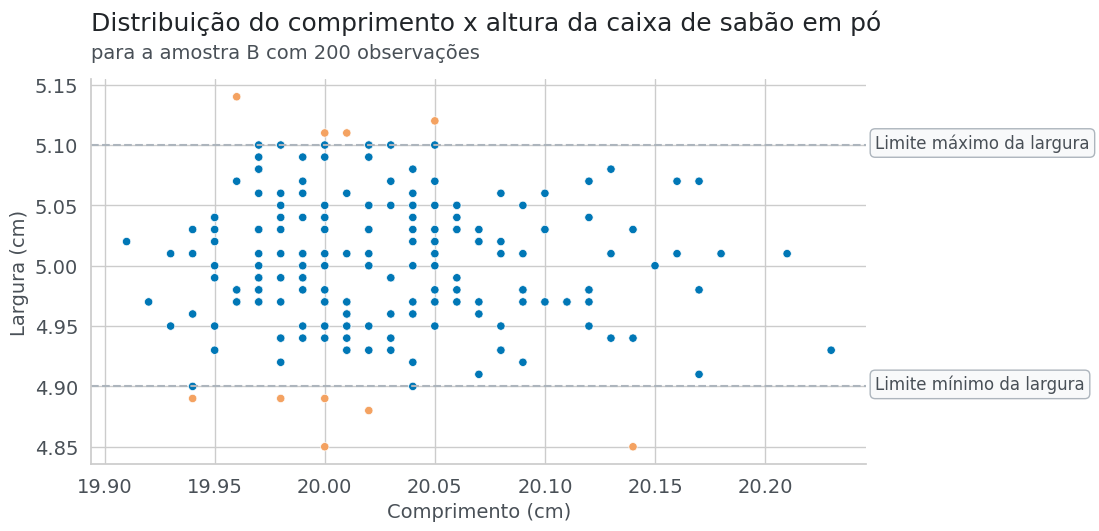

In [24]:
# Gerando área do gráfico e tema
fig, ax = plt.subplots(figsize=(10,5))
sns.set_theme(style='white')

# Definição das cores e mapeando as cores para a faixa desejada
cores=[LARANJA1, AZUL2]
rejeita_lar = [True if (c > 5*(1+0.02) or c < 5*(1-0.02)) else False for c in amostra_b['largura']]
map_cores = np.where(rejeita_lar, cores[0], cores[1])

# Gerando gráfico de dispersão
ax = sns.scatterplot(data=amostra_b, x='comprimento', y='largura', color=map_cores)

# Personalização do gráfico
plt.suptitle('Distribuição do comprimento x altura da caixa de sabão em pó',
             size=18,
             color=CINZA1,
             ha='right',
             x=0.915,
             y=1.02)
plt.title('para a amostra B com 200 observações',
         fontsize=14,
         color=CINZA2,
         loc='left',
         pad=15)
ax.set_xlabel('Comprimento (cm)', fontsize=14, color=CINZA2)
ax.set_ylabel('Largura (cm)', fontsize=14, color=CINZA2)
ax.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA2)
ax.yaxis.set_tick_params(labelsize=14, labelcolor=CINZA2)
sns.despine()

# Inclusão de linhas horizontais com os limites máximos e mínimos de largura
ax.text(20.25, 4.894,
        'Limite mínimo da largura',
        fontsize=12,
        color=CINZA2,
        va='bottom',bbox=dict(boxstyle='round', fc=CINZA5, ec=CINZA3))
plt.axhline(y= 5 * (1-0.02), color=CINZA3, linestyle='--')

ax.text(20.25, 5.094,
        'Limite máximo da largura',
        fontsize=12,
        color=CINZA2,
        va='bottom',
        bbox=dict(boxstyle='round', fc=CINZA5, ec=CINZA3))
plt.axhline(y= 5 * (1+0.02), color=CINZA3, linestyle='--')

plt.show()